In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [2]:
train_df = pd.read_csv("sign_mnist_train.csv")
test_df = pd.read_csv("sign_mnist_test.csv")

In [3]:
train_data = np.array(train_df , dtype = 'float32')
test_data = np.array(test_df, dtype='float32')

In [4]:
class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 
               'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y' ]

C:\Users\medik\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

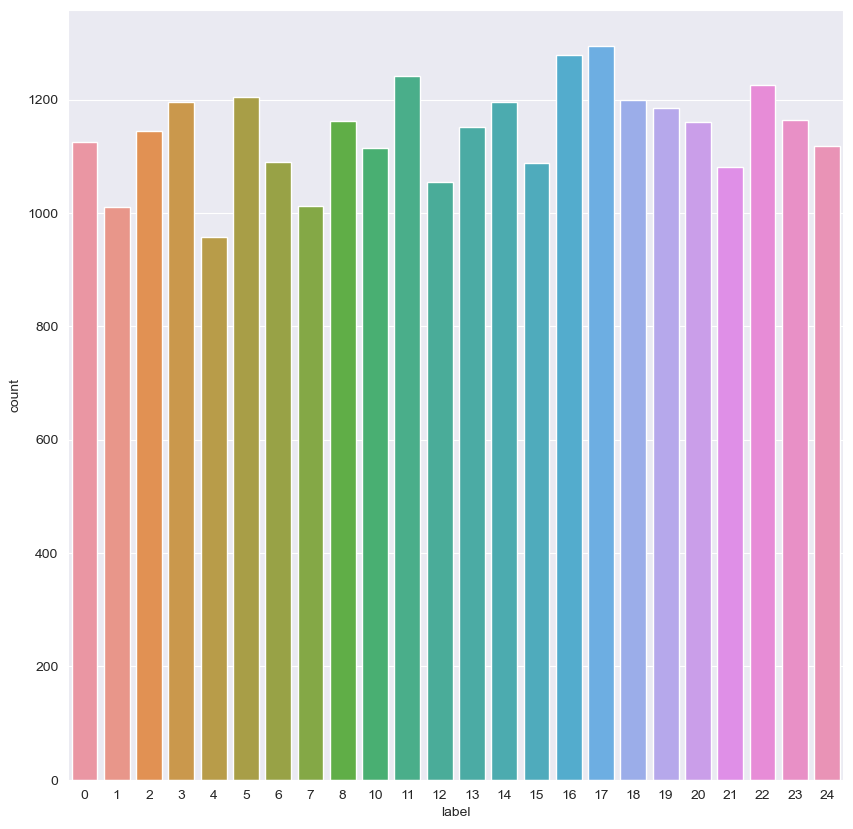

In [5]:
import seaborn as sns
plt.figure(figsize = (10,10))
sns.set_style("darkgrid")
sns.countplot(train_df['label'])

In [6]:
X_train = train_data[:, 1:] /255.
X_test = test_data[:, 1:] /255.


y_train = train_data[:, 0]
y_train_cat = to_categorical(y_train, num_classes=25)

y_test = test_data[:,0]
y_test_cat = to_categorical(y_test, num_classes=25)


X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)

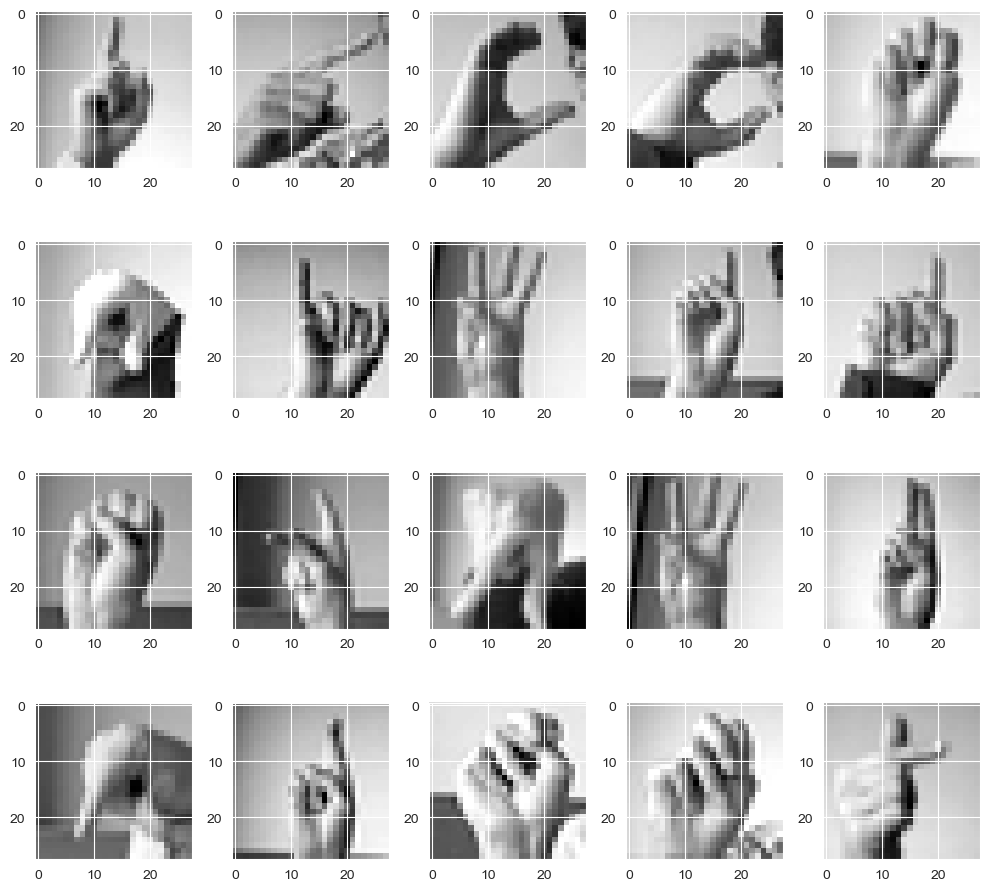

In [7]:
f, ax = plt.subplots(4,5) 
f.set_size_inches(10, 10)
k = 0
for i in range(4):
    for j in range(5):
        ax[i,j].imshow(X_train[k].reshape(28, 28) , cmap = "gray")
        k += 1
    plt.tight_layout()  

In [8]:


datagen = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False,  
        featurewise_std_normalization=False,   
        samplewise_std_normalization=False,   
        zca_whitening=False,  
        rotation_range=10,  
        zoom_range = 0.1,
        width_shift_range=0.1, 
        height_shift_range=0.1, 
        horizontal_flip=False,  
        vertical_flip=False)  


datagen.fit(X_train)

In [9]:
from keras.callbacks import ReduceLROnPlateau
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.5, min_lr=0.00001)

In [10]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape = (28,28,1), activation='relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(Dense(25, activation = 'softmax'))

In [11]:
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 64)          0

In [12]:
from datetime import datetime 
batch_size=16
start1 = datetime.now() 
history = model.fit(datagen.flow(X_train,y_train_cat, batch_size = 128) ,
                    epochs = 20
                    , validation_data = (X_test, y_test_cat) , 
                    callbacks= [learning_rate_reduction])

stop1 = datetime.now()

execution_time = stop1-start1
print("Execution time is: ", execution_time)

Epoch 1/20
215/215 [==============================] - 31s 139ms/step - loss: 2.8086 - accuracy: 0.1416 - val_loss: 1.9330 - val_accuracy: 0.3811 - lr: 0.0010
Epoch 2/20
215/215 [==============================] - 38s 177ms/step - loss: 1.7945 - accuracy: 0.4149 - val_loss: 1.2017 - val_accuracy: 0.5969 - lr: 0.0010
Epoch 3/20
215/215 [==============================] - 28s 130ms/step - loss: 1.2515 - accuracy: 0.5769 - val_loss: 0.7272 - val_accuracy: 0.7468 - lr: 0.0010
Epoch 4/20
215/215 [==============================] - 27s 123ms/step - loss: 0.9577 - accuracy: 0.6751 - val_loss: 0.4894 - val_accuracy: 0.8345 - lr: 0.0010
Epoch 5/20
215/215 [==============================] - 26s 121ms/step - loss: 0.7716 - accuracy: 0.7367 - val_loss: 0.3869 - val_accuracy: 0.8695 - lr: 0.0010
Epoch 6/20
215/215 [==============================] - 27s 124ms/step - loss: 0.6465 - accuracy: 0.7754 - val_loss: 0.3034 - val_accuracy: 0.8890 - lr: 0.0010
Epoch 7/20
215/215 [==============================] 

In [13]:
print("Accuracy of the model is - " , model.evaluate(X_test, y_test_cat)[1]*100 , "%")

225/225 [==============================] - 2s 8ms/step - loss: 0.0529 - accuracy: 0.9879
Accuracy of the model is -  98.78695011138916 %


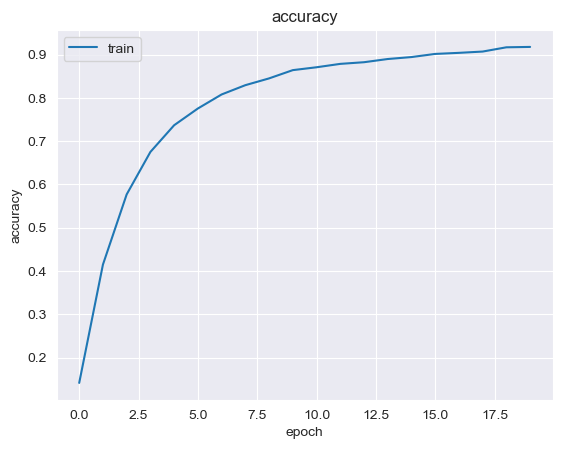

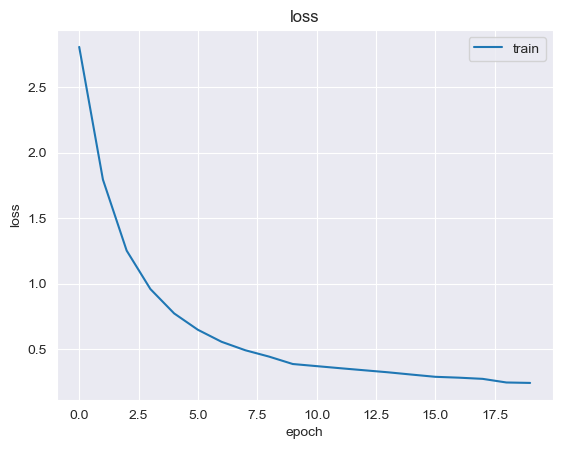

In [14]:
plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.title('accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'])
plt.show()

plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'])
plt.show()

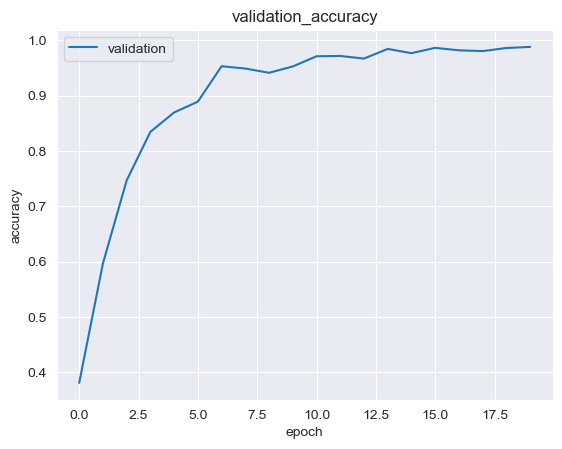

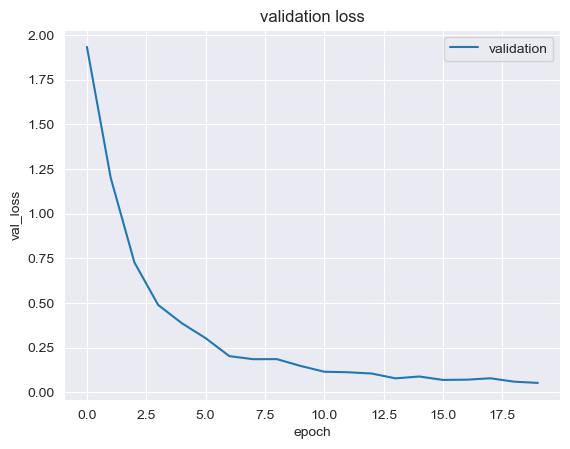

In [15]:
plt.plot(history.history['val_accuracy'])
plt.title('validation_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['validation'])
plt.show()


#plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('validation loss')
plt.ylabel('val_loss')
plt.xlabel('epoch')
plt.legend(['validation'])
plt.show()

In [16]:
prediction=model.predict(X_test) 
y = test_df['label']
predictions=np.argmax(prediction,axis=1)

225/225 [==============================] - 2s 7ms/step


Predicted Label:  U
True Label:  U


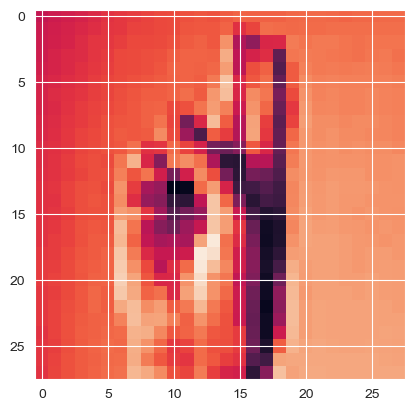

In [19]:
i = random.randint(1,len(prediction))
plt.imshow(X_test[i,:,:,0]) 
print("Predicted Label: ", class_names[int(predictions[i])])
print("True Label: ", class_names[int(y_test[i])])